## Import required libraries

In [1]:
#pandas
import pandas as pd 

#tensorflow
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns 

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#regular expression
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Load dataset

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop unnecessary columns

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Rename dataset columns

In [4]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Check for null values

In [5]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
df.shape

(5572, 2)

## Independent and Dependent features

In [7]:
X = df.drop('label',axis=1)
y = df.label

In [8]:
X.shape,y.shape

((5572, 1), (5572,))

## Encode target variable

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

## Data preprocessing

In [10]:
# Vocabulary size
voc_size = 3000

In [11]:
messages = X.copy()

In [12]:
messages.reset_index(inplace=True)
messages.head()

,index,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,U dun say so early hor... U c already then say...
4,4,"Nah I don't think he goes to usf, he lives aro..."


In [13]:

ps = PorterStemmer()

corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## OneHot representation

In [15]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [16]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [17]:
onehot_repr[0]

[2517,
 2246,
 722,
 617,
 734,
 1732,
 2737,
 2249,
 442,
 1809,
 886,
 361,
 198,
 864,
 2777,
 371]

## Word Embedding


**The original senteces have different length. Padding techinque is used to make all sentences with equal length by adding 0's from start(pre-padding) or end(post-padding)**

In [18]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  864 2777  371]
 [   0    0    0 ... 1952  361  840]
 [ 760 2802 1025 ...  731 1678  314]
 ...
 [   0    0    0 ... 2274 1472 1959]
 [   0    0    0 ... 1053  732 2463]
 [   0    0    0 ...  385 2513 1557]]


In [19]:
embedded_docs[0]

array([   0,    0,    0,    0, 2517, 2246,  722,  617,  734, 1732, 2737,
       2249,  442, 1809,  886,  361,  198,  864, 2777,  371], dtype=int32)

## Model creation

In [20]:
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            120000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 176,501
Trainable params: 176,501
Non-trainable params: 0
_________________________________________________________________


## Split data

In [22]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [23]:
X_final.shape,y_final.shape

((5572, 20), (5572,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

## Model Training

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
59/59 [==============================] - 4s 32ms/step - loss: 0.3307 - accuracy: 0.8880 - val_loss: 0.1648 - val_accuracy: 0.9565
Epoch 2/10
59/59 [==============================] - 1s 24ms/step - loss: 0.0907 - accuracy: 0.9780 - val_loss: 0.0675 - val_accuracy: 0.9831
Epoch 3/10
59/59 [==============================] - 1s 23ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0600 - val_accuracy: 0.9848
Epoch 4/10
59/59 [==============================] - 1s 25ms/step - loss: 0.0178 - accuracy: 0.9954 - val_loss: 0.0648 - val_accuracy: 0.9810
Epoch 5/10
59/59 [==============================] - 1s 24ms/step - loss: 0.0190 - accuracy: 0.9968 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 6/10
59/59 [==============================] - 1s 24ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0795 - val_accuracy: 0.9859
Epoch 7/10
59/59 [==============================] - 2s 26ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0862 - val_accuracy: 0.9859
Epoch 8/10
59

## Model Evaluation

In [26]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

58/58 [==============================] - 1s 4ms/step


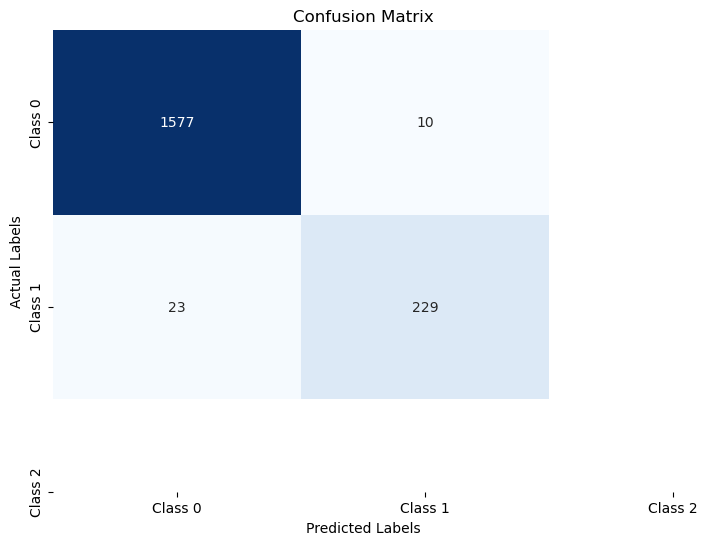

In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.96      0.91      0.93       252

    accuracy                           0.98      1839
   macro avg       0.97      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

